# NLP Sentiment Analysis and Classification Models

### Importing libraries

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Download if needed
#nltk.download("punkt")
#nltk.download('stopwords')
#nltk.download('wordnet')

### Loading Data

In [3]:
data = pd.read_csv('train.tsv', sep='\t')

### Checking Data

In [4]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
data.shape

(156060, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [7]:
data['Sentiment'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

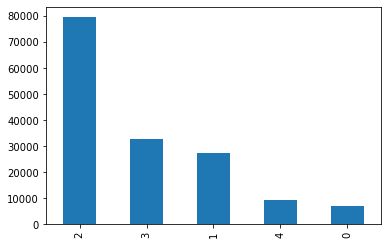

In [8]:
data['Sentiment'].value_counts().plot.bar()

### Label Encoding

Taking 0,1 as negative and 3,4 as positive, dropping 2

In [9]:
data["Sentiment"].replace([0,1,3,4], ["negative", "negative", "positive", "positive"], inplace = True)

In [10]:
data.shape

(156060, 4)

In [11]:
data.drop(data.loc[data['Sentiment']==2].index, inplace=True)

In [12]:
data.shape

(76478, 4)

In [13]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
21,22,1,good for the goose,positive
22,23,1,good,positive
33,34,1,"the gander , some of which occasionally amuses...",negative
46,47,1,amuses,positive


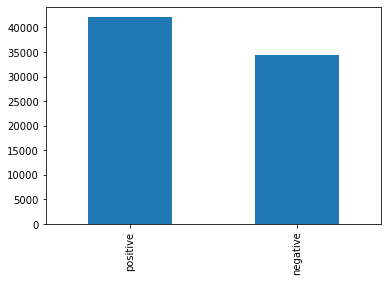

In [14]:
data['Sentiment'].value_counts().plot.bar()

In [15]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
21,22,1,good for the goose,positive
22,23,1,good,positive
33,34,1,"the gander , some of which occasionally amuses...",negative
46,47,1,amuses,positive


In [16]:
df=pd.DataFrame()
df['sentences'] = data['Phrase']
df['label'] = data['Sentiment']

In [17]:
df.head()

,sentences,label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


In [18]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-100:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [19]:
# An alternative code
#pd.Series(" ".join(df["sentences"]).split()).value_counts()[pd.Series(" ".join(df["sentences"]).split()).value_counts() <=2]

In [20]:
df.shape

(76478, 2)

#### Text Processing

In [21]:
def cleaning(data):
    
    #1.Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #2. Remove punc
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stopwords.words('english')]
    
    #4. Lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #5. Joining
    return ' '.join(text_cleaned)

In [22]:
#Alternative way

## **Word Tokenization and lowercase**
#df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))
##**Remove Punctuation and numbers and chars like "*" and "#"**
#df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))
## **Remove Stopwords**
#stop_words = stopwords.words('english')
#df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))
## **lemmatization**
#lem=WordNetLemmatizer()
#df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))
## join
#df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [23]:
df['sentences'] = df['sentences'].apply(cleaning)

In [24]:
df.head()

,sentences,label
0,series escapade demonstrating adage good goose...,negative
21,good goose,positive
22,good,positive
33,gander occasionally amuses none amount much story,negative
46,amuses,positive


### Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df['sentences'], df['label'], test_size=0.3, random_state=42)

In [27]:
X_train.shape

(53534,)

In [28]:
X_test.shape

(22944,)

In [29]:
X_train.head()

110319                                      mindless drivel
16891                                  tired going man gone
65038     notable largely overwhelming creepiness eagerness
8038      though scratch surface least provides strong i...
64644                                       moment hilarity
Name: sentences, dtype: object

In [30]:
encoder = preprocessing.LabelEncoder()

In [31]:
y_train = encoder.fit_transform(y_train)

In [32]:
y_test= encoder.fit_transform(y_test)

In [33]:
y_train[0:5]

array([0, 0, 1, 1, 1])

In [34]:
y_test[0:5]

array([0, 1, 0, 1, 0])

### Count Vectorizer

In [35]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [36]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [37]:
vectorizer.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [38]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### TF-IDF

In [39]:
tf_idf_word_vec = TfidfVectorizer()
tf_idf_word_vec.fit(X_train)

TfidfVectorizer()

In [40]:
X_train_tfidf = tf_idf_word_vec.transform(X_train)

In [41]:
X_test_tfidf = tf_idf_word_vec.transform(X_test)

In [42]:
tf_idf_word_vec.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [43]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
a = pd.DataFrame(X_test_tfidf.toarray())

In [45]:
pd.set_option('display.max_columns',1000)

In [46]:
a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,12168,12169,12170,12171,12172,12173,12174,12175,12176,12177,12178,12179,12180,12181,12182,12183,12184,12185,12186,12187,12188,12189,12190,12191,12192,12193,12194,12195,12196,12197,12198,12199,12200,12201,12202,12203,12204,12205,12206,12207,12208,12209,12210,12211,12212,12213,12214,12215,12216,12217,12218,12219,12220,12221,12222,12223,12224,12225,12226,12227,12228,12229,12230,12231,12232,12233,12234,12235,12236,12237,12238,12239,12240,12241,12242,12243,12244,12245,12246,12247,12248,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293,12294,12295,12296,12297,12298,12299,12300,12301,12302,12303,12304,12305,12306,12307,12308,12309,12310,12311,12312,12313,12314,12315,12316,12317,12318,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329,12330,12331,12332,12333,12334,12335,12336,12337,12338,12339,12340,12341,12342,12343,12344,12345,12346,12347,12348,12349,12350,12351,12352,12353,12354,12355,12356,12357,12358,12359,12360,12361,12362,12363,12364,12365,12366,12367,12368,12369,12370,12371,12372,12373,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383,12384,12385,12386,12387,12388,12389,12390,12391,12392,12393,12394,12395,12396,12397,12398,12399,12400,12401,12402,12403,12404,12405,12406,12407,12408,12409,12410,12411,12412,12413,12414,12415,12416,12417,12418,12419,12420,12421,12422,12423,12424,12425,12426,12427,12428,12429,12430,12431,12432,12433,12434,12435,12436,12437,12438,12439,12440,12441,12442,12443,12444,12445,12446,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456,12457,12458,12459,12460,12461,12462,12463,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475,12476,12477,12478,12479,12480,12481,12482,12483,12484,12485,12486,12487,12488,12489,12490,12491,12492,12493,12494,12495,12496,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513,12514,12515,12516,12517,12518

### Classification Models

### Logistic Regression

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 8540  1699]
 [ 1227 11478]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     10239
           1       0.87      0.90      0.89     12705

    accuracy                           0.87     22944
   macro avg       0.87      0.87      0.87     22944
weighted avg       0.87      0.87      0.87     22944



In [49]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

Count Vectors Accuracy: 0.8365592157622517


In [50]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
log_accuracy_tf = model_selection.cross_val_score(log_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_tf)

TF-IDF Accuracy: 0.8301090274335057


### XGBOOST Classifier

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 4817  5422]
 [  754 11951]]
              precision    recall  f1-score   support

           0       0.86      0.47      0.61     10239
           1       0.69      0.94      0.79     12705

    accuracy                           0.73     22944
   macro avg       0.78      0.71      0.70     22944
weighted avg       0.77      0.73      0.71     22944



In [53]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

Count Vectors Accuracy: 0.7158733116418127


In [54]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf , y_train)
xgb_accuracy_tf = model_selection.cross_val_score(xgb_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", xgb_accuracy_tf)

TF-IDF Accuracy: 0.711863020515772


### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = dsc_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 8403  1836]
 [ 1242 11463]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85     10239
           1       0.86      0.90      0.88     12705

    accuracy                           0.87     22944
   macro avg       0.87      0.86      0.86     22944
weighted avg       0.87      0.87      0.87     22944



In [57]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
dsc_accuracy_count = model_selection.cross_val_score(dsc_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", dsc_accuracy_count)

Count Vectors Accuracy: 0.8032168411295544


In [58]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_tfidf , y_train)
dsc_accuracy_tf = model_selection.cross_val_score(dsc_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", dsc_accuracy_tf)

TF-IDF Accuracy: 0.7898358510312969


### Comparing Results

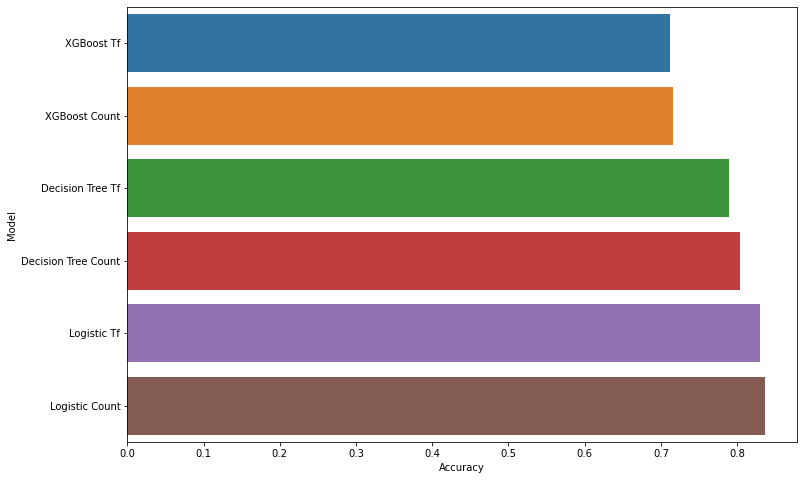

In [59]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "Decision Tree Count","Decision Tree Tf"],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, xgb_accuracy_count, xgb_accuracy_tf, dsc_accuracy_count,dsc_accuracy_tf]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)